In [35]:
import numpy as np #import numpy
import pandas as pd #import pandas
import seaborn as sns # import seaborn
import matplotlib.pyplot as plt #import pyplot
from scipy.stats import pearsonr #for pearson's correlation

from sklearn.model_selection import train_test_split #for splitting the data in train and test
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler #for various scaling methods
from sklearn.linear_model import LogisticRegression #for LogisticRegression
from sklearn.naive_bayes import GaussianNB #for NaiveBayes
from sklearn.neighbors import KNeighborsClassifier #for KNN
from sklearn.svm import SVC #for Support vector classifier


from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  #for image
from sklearn import tree #for tree
from os import system #using user environment
from sklearn.ensemble import BaggingClassifier #for bagging classifier
from sklearn.ensemble import AdaBoostClassifier #for adaptive boosting
from sklearn.ensemble import GradientBoostingClassifier #for gradient boosting
from sklearn.ensemble import RandomForestClassifier #for random forest
from sklearn.preprocessing import LabelEncoder #for lebel encoder

from sklearn.tree import export_graphviz #for exporting dot data
# from sklearn.externals.six import StringIO  #for stringIO
# from IPython.display import Image  #for including image
# import pydotplus #for dot data
# import graphviz #for visualizing decision tree
from statistics import median,mean

from sklearn.metrics import accuracy_score,confusion_matrix,recall_score #for accuracy matrices
from sklearn.metrics import precision_score,classification_report,roc_auc_score,precision_score #for accuracy matrices

In [37]:
# Loading the Dataset:
DataFrame = pd.read_csv('Bank-full.csv') #reading the CSV file
DataFrame.head() #to check head of the dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [38]:
DataFrame.tail() 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


# EDA on our dataset:

In [39]:
print('\033[1m''Number of rows in dataframe',DataFrame.shape[0]) #for number of rows
print('\033[1m''Number of features in dataframe',DataFrame.shape[1]) #for number of features

Number of rows in dataframe 45211
Number of features in dataframe 17


In [40]:
DataFrame.shape

(45211, 17)

**10 Features are of Object Type and rest 7 are of Integer DataType.**
**Since 10 Features are of object based category datatype, will have to convert it to categorical datatype.**

In [41]:
DataFrame.dtypes.to_frame('Datatypes of attributes').T #for datatypes of attributes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,object,object,object,object,int64,object,object,object,int64,object,int64,int64,int64,int64,object,object


In [42]:
DataFrame[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = DataFrame[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
DataFrame.dtypes.to_frame('Datatypes of attributes').T #for datatypes of attributes

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Datatypes of attributes,int64,category,category,category,category,int64,category,category,category,int64,category,int64,int64,int64,int64,category,category


1. After conversion of datatypes in above step
2. 10 features have category datatype and 7 have int datatype

In [43]:
# Checking Missing Values in our dataset:
DataFrame.isnull().sum().to_frame('Presence of missing values').T 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
Presence of missing values,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
DataFrame['poutcome'].value_counts() #For count of unique values in poutcome

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

In [45]:
DataFrame['contact'].value_counts() #For count of unique values in contact

cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64

In [46]:
DataFrame['education'].value_counts() #For count of unique values in education

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

In [47]:
DataFrame['job'].value_counts() #For count of unique values in job

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [49]:
DataFrame['housing'].value_counts() # For count of unique values in housing

yes    25130
no     20081
Name: housing, dtype: int64

In [50]:
DataFrame.describe().T #for 5 point summary

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


5 point summary understanding:
1. Outliers are present in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
2. 'balance', 'duration', 'campaign', 'pdays' and 'previous' are right skewed.
3. More than 75% people have been contacted in a day after previous campaign as pdays is -1 till 75th precentile
4. Minimum balance is -8019 and maximum balance is 102127
5. Minimum age is 18 years and maximum is 95 years

In [51]:
DataFrame.loc[DataFrame['pdays'] == 999]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


**All customers have been contacted previously**


# Distribution of Categorical columns:


C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  from ipykernel import kernelapp as app


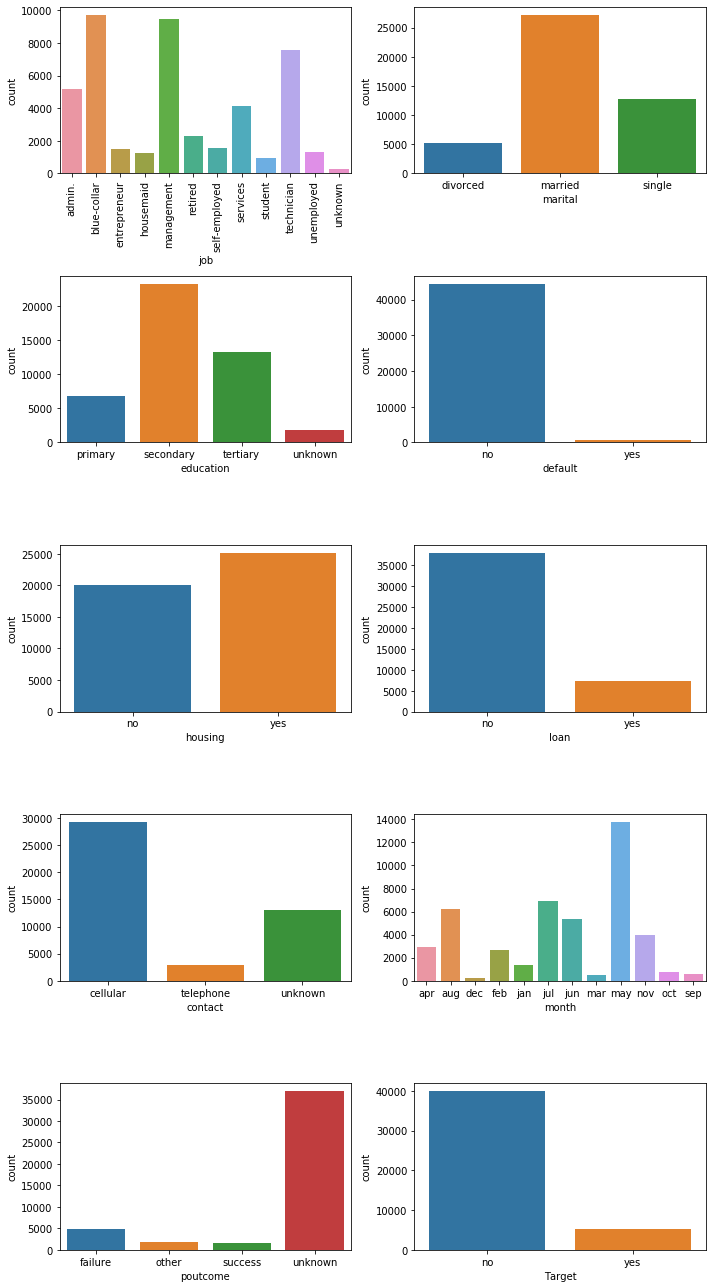

In [53]:
fig, axe = plt.subplots(nrows=5, ncols=2, figsize=(10, 18)) 
axe = axe.flatten() #to flatten subplot index positions
plot=sns.countplot(x=DataFrame['job'],data=DataFrame,ax=axe[0]) #Countplot of 'job' 
plt.setp(plot.get_xticklabels(), rotation=90)
sns.countplot(x=DataFrame['marital'],data=DataFrame,ax=axe[1]) #Countplot of 'marital' 
sns.countplot(x=DataFrame['education'],data=DataFrame,ax=axe[2]) #Countplot of 'education' 
sns.countplot(x=DataFrame['default'],data=DataFrame,ax=axe[3]) #Countplot of 'default' 
sns.countplot(x=DataFrame['housing'],data=DataFrame,ax=axe[4]) #Countplot of 'housing' 
sns.countplot(x=DataFrame['loan'],data=DataFrame,ax=axe[5]) #Countplot of 'loan' 
sns.countplot(x=DataFrame['contact'],data=DataFrame,ax=axe[6]) #Countplot of 'contact' 
sns.countplot(x=DataFrame['month'],data=DataFrame,ax=axe[7]) #Countplot of 'month' 
sns.countplot(x=DataFrame['poutcome'],data=DataFrame,ax=axe[8]) #Countplot of 'poutcome' 
sns.countplot(x=DataFrame['Target'],data=DataFrame,ax=axe[9]) #Countplot of 'target' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots

# Understanding from distributions:
1. More than 90% customers have no default credit
2. Around 88% customers have not subscribed for term deposit
3. Most customers have been contacted in may
4. Most customers have been contacted by cellular network(mobile phone)
5. Number of customers who have housing loan is more than the number of customers who don't have housing loan
6. Around 6% customers have credit in default


# Measure of skewness of numerical columns:

In [54]:
DataFrame.skew().to_frame('Skewness measure').T #for measure of skewness

,age,balance,day,duration,campaign,pdays,previous
Skewness measure,0.684818,8.360308,0.093079,3.144318,4.89865,2.615715,41.846454


# Checking the presence of outliers:

C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:11: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # This is added back by InteractiveShellApp.init_path()


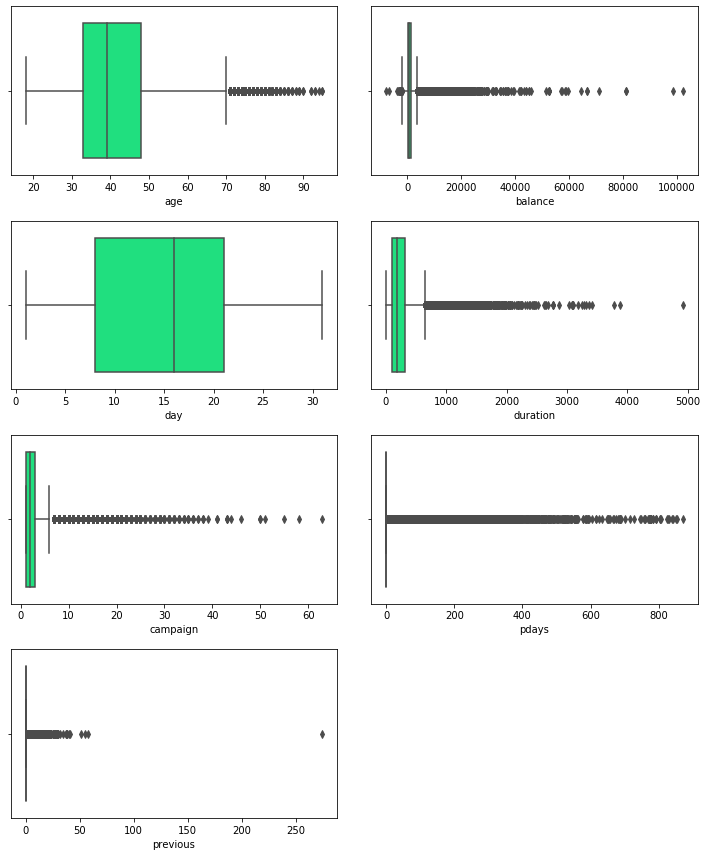

In [55]:
fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=DataFrame,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=DataFrame,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=DataFrame,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=DataFrame,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=DataFrame,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=DataFrame,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=DataFrame,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)

# Understanding from boxplots:
1. Prove the existance of outliers in 'age', 'balance', 'duration', 'campaign', 'pdays' and 'previous' columns.
2. Values less than 0 are present in 'Balance' column


# Distribution of Target column:

In [56]:
DataFrame['Target'].value_counts().to_frame('Target column distriution') # Value counts of Target column

,Target column distriution
no,39922
yes,5289


**From above values it can be stated that the dataset is imbalanced.**


# Data Preprocessing:


# Label Encoding of variables:

In [57]:
df_2 = DataFrame.copy() #making a copy of dataframe 'df_2'
encoder = LabelEncoder() #creating object of LabelEncoder 
df_2['default'] = encoder.fit_transform(df_2['default']).astype(int) #encoding 'default' column 
df_2['marital'] = encoder.fit_transform(df_2['marital']).astype(int) #encoding 'marital' column and assigning 1 married, 2 divorced and 3 single 
df_2['loan'] = encoder.fit_transform(df_2['loan']).astype(int) #encoding 'loan' column and assigning 0 no and 1 yes values
df_2['housing'] = encoder.fit_transform(df_2['housing']).astype(int) #encoding 'housing' column and assigning 0 no and 1 yes values
df_2['Target'] = encoder.fit_transform(df_2['Target']).astype(int) #encoding 'target' column and assigning 0 no and 1 yes values
df_2['month'] = encoder.fit_transform(df_2['month']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2['poutcome'] = encoder.fit_transform(df_2['poutcome']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2['education'] = encoder.fit_transform(df_2['education']).astype(int)#encoding 'month' column and assigning 0-11 values
df_2.head() #displaying head of encoded dataframe

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,1,2,0,2143,1,0,unknown,5,8,261,1,-1,0,3,0
1,44,technician,2,1,0,29,1,0,unknown,5,8,151,1,-1,0,3,0
2,33,entrepreneur,1,1,0,2,1,1,unknown,5,8,76,1,-1,0,3,0
3,47,blue-collar,1,3,0,1506,1,0,unknown,5,8,92,1,-1,0,3,0
4,33,unknown,2,3,0,1,0,0,unknown,5,8,198,1,-1,0,3,0


# Checking & modifying datatypes after Label Encoding:

In [58]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  int32   
 3   education  45211 non-null  int32   
 4   default    45211 non-null  int32   
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  int32   
 7   loan       45211 non-null  int32   
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  int32   
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  int32   
 16  Target     45211 non-null  int32   
dtypes: category(2), int32(8), int64(7)
memory usage: 3.9 MB


In [59]:
df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']] = df_2[['job','marital','education','default','housing','loan','contact','month','poutcome','Target']].apply(pd.Categorical)
#changing datatypes of attributes

In [60]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   age        45211 non-null  int64   
 1   job        45211 non-null  category
 2   marital    45211 non-null  category
 3   education  45211 non-null  category
 4   default    45211 non-null  category
 5   balance    45211 non-null  int64   
 6   housing    45211 non-null  category
 7   loan       45211 non-null  category
 8   contact    45211 non-null  category
 9   day        45211 non-null  int64   
 10  month      45211 non-null  category
 11  duration   45211 non-null  int64   
 12  campaign   45211 non-null  int64   
 13  pdays      45211 non-null  int64   
 14  previous   45211 non-null  int64   
 15  poutcome   45211 non-null  category
 16  Target     45211 non-null  category
dtypes: category(10), int64(7)
memory usage: 2.8 MB


# Handeling Outliers with mean replacement:

C:\Users\Akshay\anaconda3\lib\site-packages\ipykernel_launcher.py:28: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


Boxplots after handeling outliers


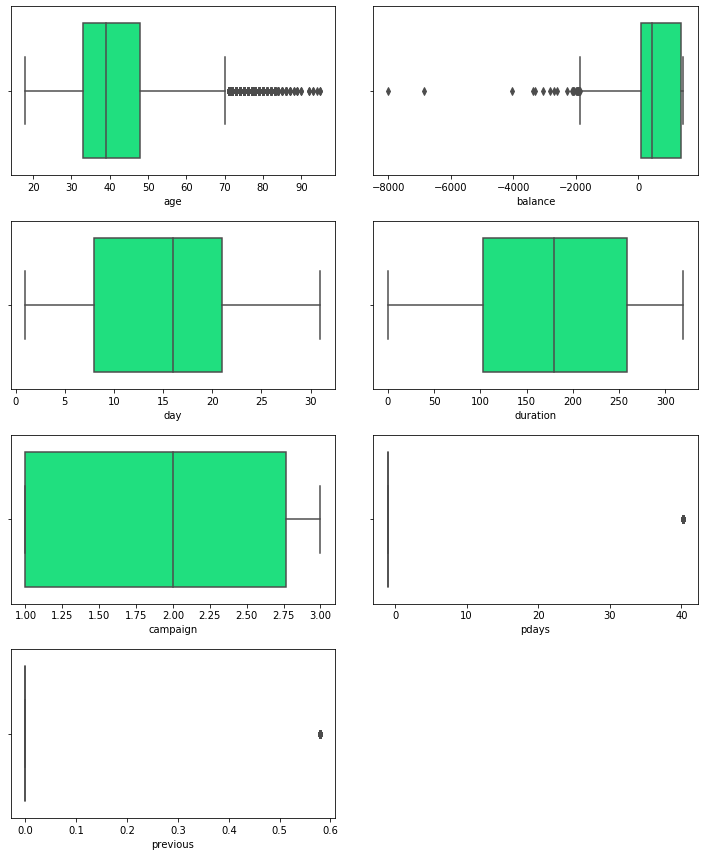

In [61]:
meanbal = float(df_2['balance'].mean()) #mean balance
df_2['balance'] = np.where(df_2['balance'] >np.percentile(df_2['balance'], 75), meanbal,df_2['balance']) #replacing with mean

meandur = float(df_2['duration'].mean()) #mean duration
df_2['duration'] = np.where(df_2['duration'] >np.percentile(df_2['duration'], 75), meandur,df_2['duration'])#replacing with mean

meancam = float(df_2['campaign'].mean()) #mean campaign
df_2['campaign'] = np.where(df_2['campaign'] >np.percentile(df_2['campaign'], 75), meancam,df_2['campaign'])#replacing with mean

meanpd = float(df_2['pdays'].mean()) #mean pdays
df_2['pdays'] = np.where(df_2['pdays'] >np.percentile(df_2['pdays'], 75), meanpd,df_2['pdays'])#replacing with mean

meanpr = float(df_2['previous'].mean()) #mean previous
df_2['previous'] = np.where(df_2['previous'] >np.percentile(df_2['previous'], 75),meanpr ,df_2['previous'])#replacing with mean



fig, axe = plt.subplots(nrows=4, ncols=2, figsize=(10, 12))
axe = axe.flatten()#to flatten subplot index positions
sns.boxplot(x='age',data=df_2,color='springgreen',ax=axe[0]) #Box plot of 'ID' for finding outliers 
sns.boxplot(x='balance',data=df_2,color='springgreen',ax=axe[1]) #Box plot of 'Family' 
sns.boxplot(x='day',data=df_2,color='springgreen',ax=axe[2]) #Box plot of 'Personal Loan' 
sns.boxplot(x='duration',data=df_2,color='springgreen',ax=axe[3]) #Box plot of 'CD Account' 
sns.boxplot(x='campaign',data=df_2,color='springgreen',ax=axe[4]) #Box plot of 'Online' 
sns.boxplot(x='pdays',data=df_2,color='springgreen',ax=axe[5]) #Box plot of 'CreditCard'
sns.boxplot(x='previous',data=df_2,color='springgreen',ax=axe[6]) #Box plot of 'CreditCard' 
fig.tight_layout() #for arranging the plots
fig.show() #display plots
axe.flat[-1].set_visible(False)
print('\033[1m''Boxplots after handeling outliers')


# Understanding from boxplots after handeling outliers:

1. Outliers in 'age' column are not handled because it is a specific value for each record.
2. After handeling Outliers in 'balance', the number of outliers on the lower side is increased.

# Corr plot of all features:

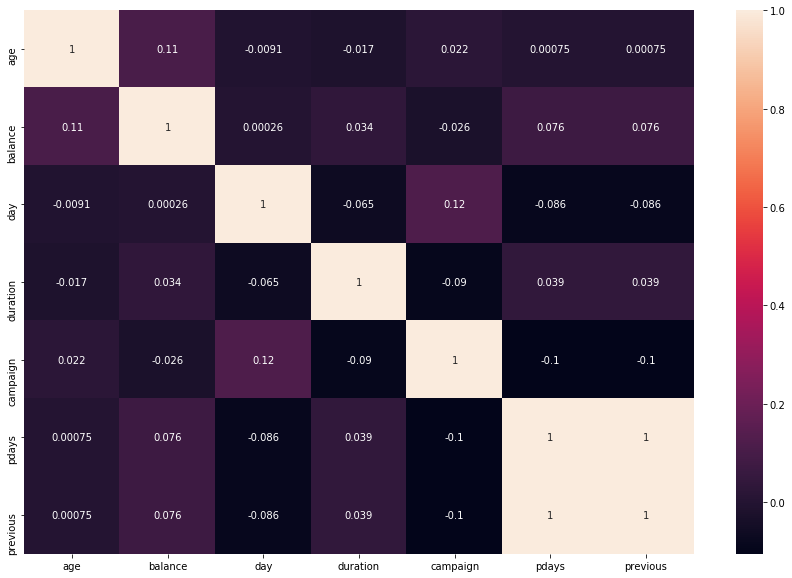

In [62]:
plt.figure(figsize=(15,10)) #for adjusting figuresize
sns.heatmap(df_2.corr(),annot=True) #for correlation plot

# Understanding from above corrp plot:
1. 'pdays' and 'previous' are highly correlated



# Removing columns:
1. 'job','education' and 'contact' attributes contain multiple unknown values.
2. As they are specific string values and not numerical so cannot be treated with median, mean replacement
3. As per data description, duration attribute is removed to have a realistic prediction.
4. 'day' and 'month' of contact will not have any realtionship with customer opting for subscription
5. 'pdays' and 'previous' are highly correlated so removing any one from both of them.
6. Even though 'poutcome' has a huge number of 'Unknown' values, it is kept because 'poutcome' is outcome of the previous marketing campaign. Which can help in better training and testing of models.

In [63]:
df_2 = df_2.drop(['job','education','contact','duration','pdays','day','month'],axis=1) #Dropping 'job','education','contact','poutcome','duration','day','month' columns
df_2.head() #Head of updated dataframe

,age,marital,default,balance,housing,loan,campaign,previous,poutcome,Target
0,58,1,0,1362.272058,1,0,1.0,0.0,3,0
1,44,2,0,29.000000,1,0,1.0,0.0,3,0
2,33,1,0,2.000000,1,1,1.0,0.0,3,0
3,47,1,0,1362.272058,1,0,1.0,0.0,3,0
4,33,2,0,1.000000,0,0,1.0,0.0,3,0


# Pairplot of features:

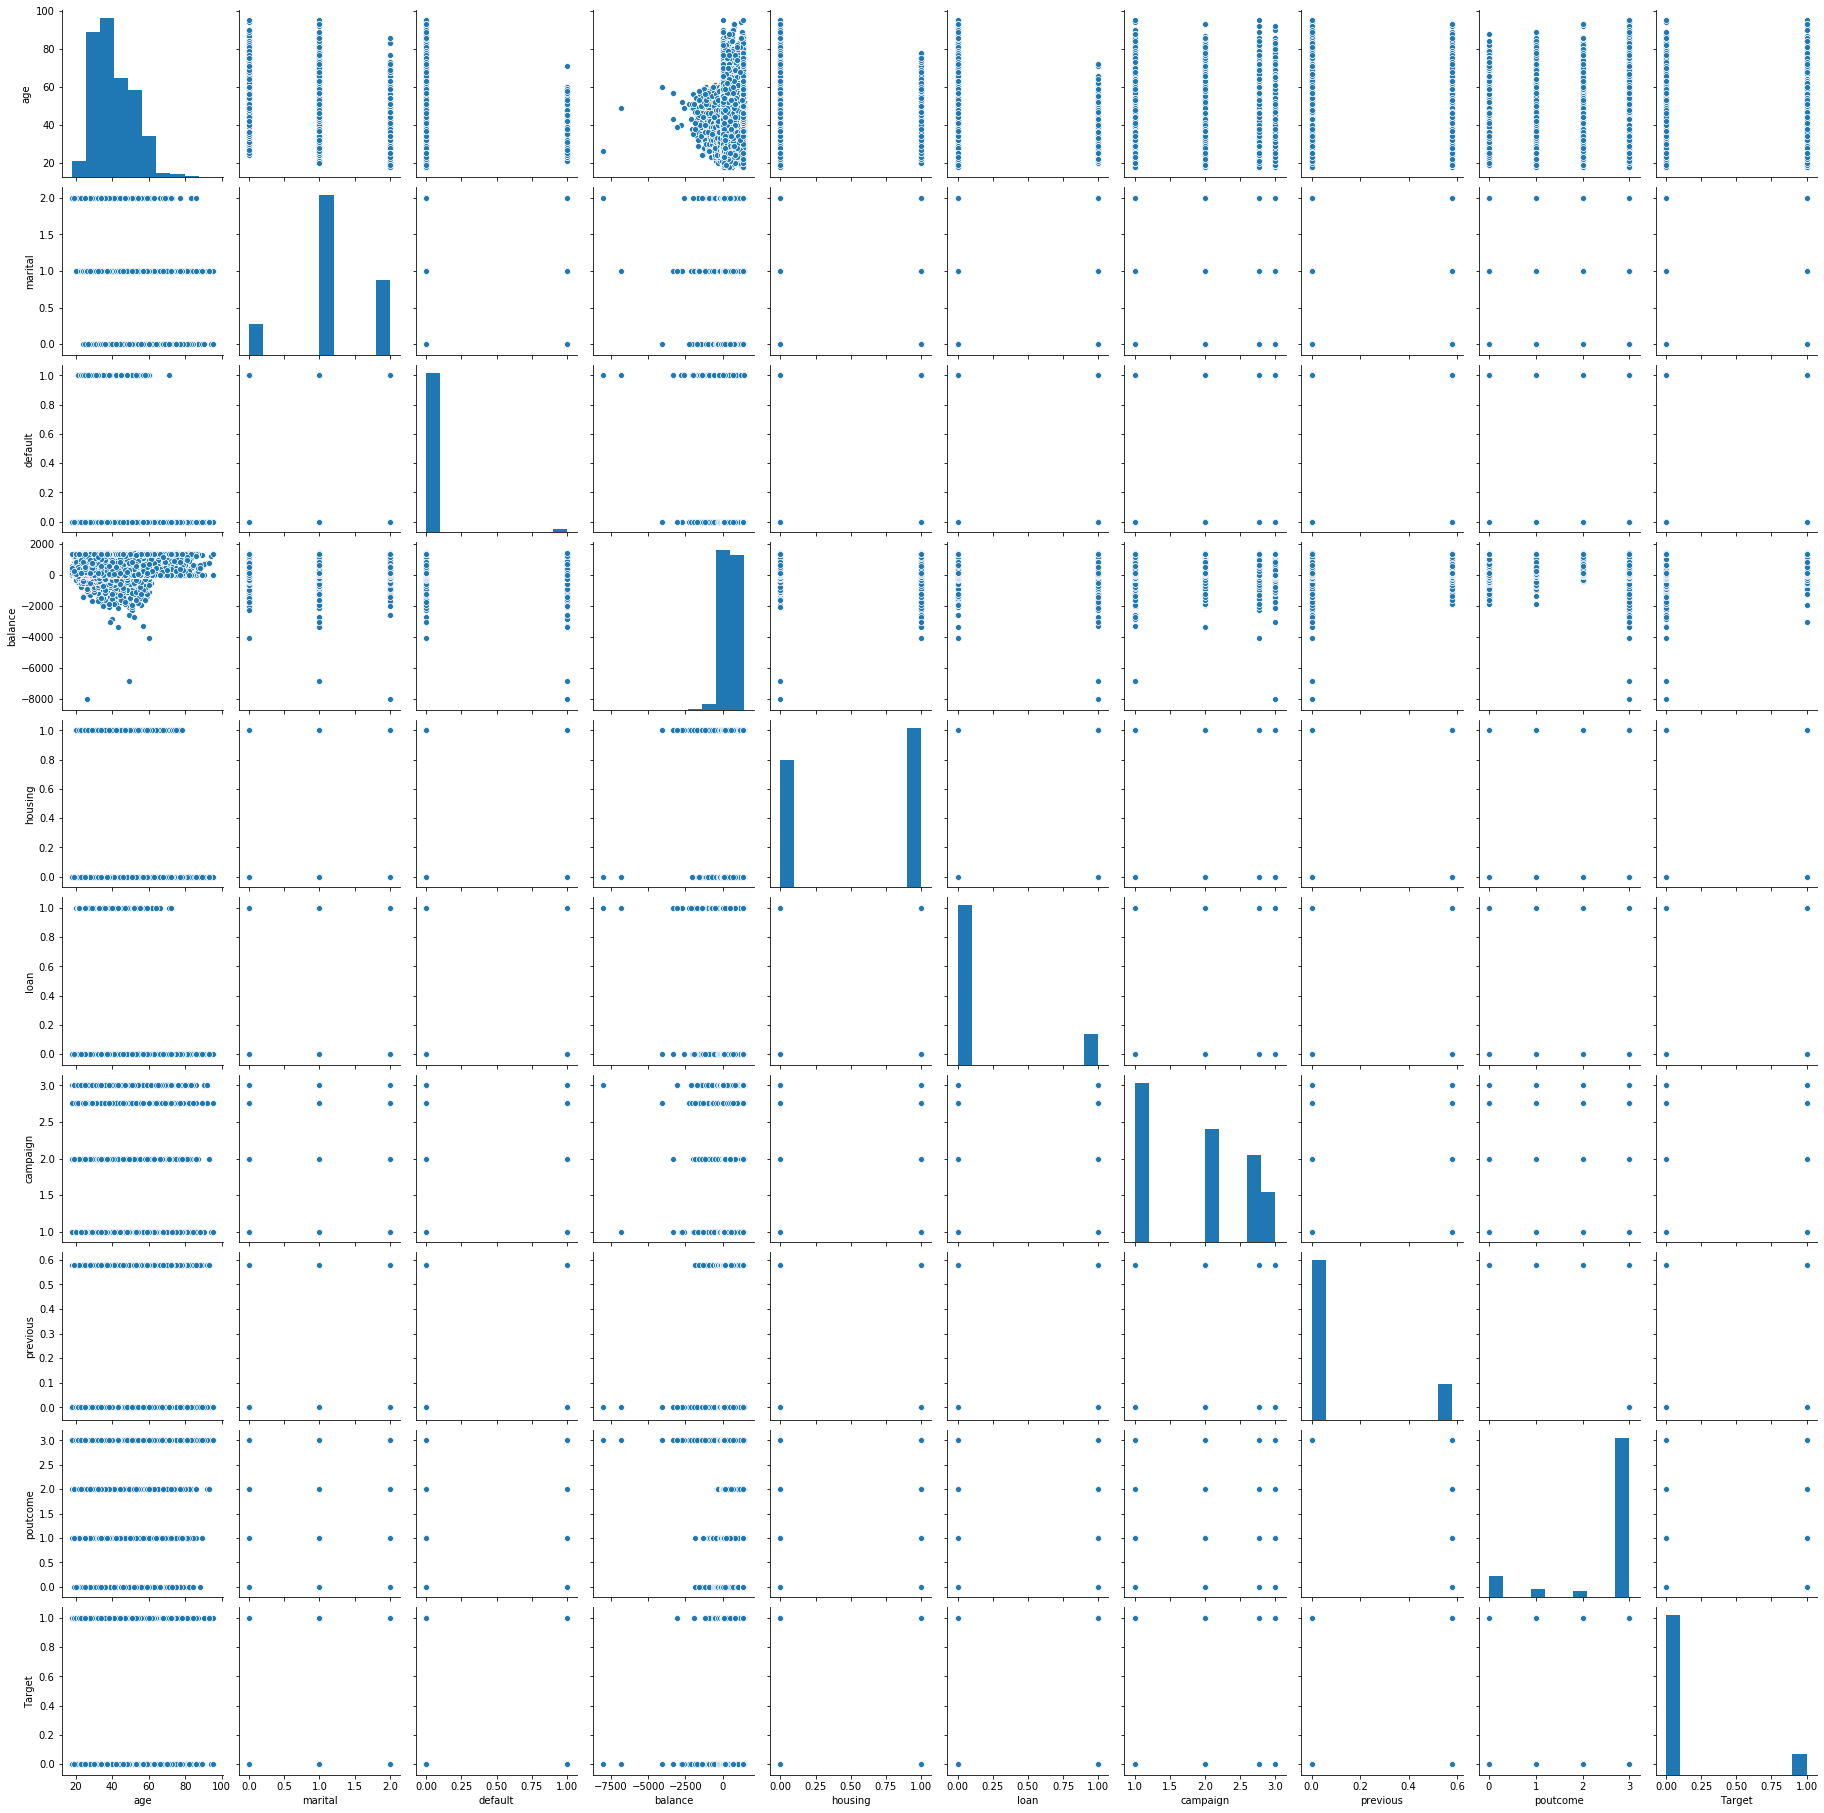

In [64]:
sns.pairplot(df_2) #Pairplot of all features

# Train Test Split (70:30):

In [65]:
X = df_2.drop('Target',axis=1) #independent dimensions  
y = df_2['Target'] #selecting target column
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=1) #train test split in 70:30 ratio

In [66]:
scaler = StandardScaler() #using standard scaler method
X_train_scaled = scaler.fit_transform(X_train) #Scaling of Train dataset
X_test_scaled = scaler.fit_transform(X_test) #Scaling of Test dataset

# Models:


# Logistic Regression:

In [67]:
logic_r = LogisticRegression(solver='liblinear') #Instantiate the LogisticRegression object
logic_r.fit(X_train_scaled,y_train) #Call the fit method of logistic regression to train the model or to learn the parameters of model
y_pred = logic_r.predict(X_test_scaled) #Predict

In [68]:
print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_pred)) #for confusion matrix
print('-'*40)
LR_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy of Logistic Regression :{:.2f}'.format(LR_accuracy)) #for accuracy score
print('-'*40)
print('\n Classification Report\n',classification_report(y_test,y_pred)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11897   116]
 [ 1310   241]]
----------------------------------------
Accuracy of Logistic Regression :0.89
----------------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.68      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

---------------------------------------------------------------


# Naive Bayes:

In [69]:
NB = GaussianNB()   #Instantiate the Gaussian Naive bayes 
NB.fit(X_train_scaled,y_train) #Call the fit method of NB to train the model or to learn the parameters of model
y_predi = NB.predict(X_test_scaled) #Predict

In [70]:
print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
print('-'*30)
NB_accuracy = accuracy_score(y_test,y_predi)
print('Accuracy of Naive Bayes :{:.2f}'.format(NB_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) #for classification report
print('-'*63)


---------------------------------------------------------------
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of Naive Bayes :0.83
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

---------------------------------------------------------------


# K-Nearest Neighbor:

In [71]:
# k=3
knn = KNeighborsClassifier(n_neighbors = 3)  #Instantiate KNN with k=3
knn.fit(X_train_scaled,y_train) #Call the fit method of KNN to train the model or to learn the parameters of model
y_predict = knn.predict(X_test_scaled) #Predict 

print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,y_predi)) #for confusion matrix
print('-'*30)
KNN_accuracy = accuracy_score(y_test,y_predict)
print('Accuracy of KNN :{:.2f}'.format(KNN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,y_predi)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[10745  1268]
 [ 1045   506]]
------------------------------
Accuracy of KNN :0.87
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.89      0.90     12013
           1       0.29      0.33      0.30      1551

    accuracy                           0.83     13564
   macro avg       0.60      0.61      0.60     13564
weighted avg       0.84      0.83      0.83     13564

---------------------------------------------------------------


optimal k is 13


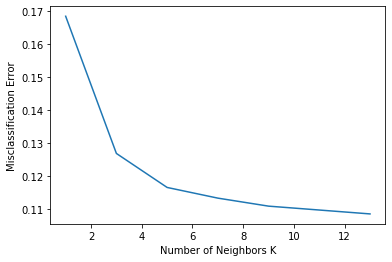

In [72]:
oddList = list(np.arange(1,15)) #Range from 1 to 15
neighbors = list(filter(lambda x: x % 2 != 0, oddList)) #Selecting only odd numbers from Range 1 to 24

accuracy_list = [] #Empty list to store accuracy scores of KNN models based on various K values

for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors = i) #Instantiate KNN with k=i
    knn.fit(X_train_scaled,y_train)  #Call the fit method of KNN to train the model or to learn the parameters of model
    y_pred = knn.predict(X_test_scaled) #Predict 
    accuracy_s = accuracy_score(y_test,y_pred) #for accuracy score
    accuracy_list.append(accuracy_s)  #for appedning accuracy score to accuracy score list
    
MSE=[1 - j for j in accuracy_list] #calculation of Mean Squared Error

optimal = neighbors[MSE.index(min(MSE))] #Optimal K value selected by minimum MSE
print('optimal k is',optimal) #Print optimal K value selected by minimum MSE

plt.plot(neighbors,MSE) #MSE plot 
plt.xlabel('Number of Neighbors K') #XLabel
plt.ylabel('Misclassification Error') #YLabel
plt.show() #display plot

# SVC:

In [73]:
svc = SVC()  #Instantiate SVC
svc.fit(X_train_scaled,y_train) #Call the fit method of SVC to train the model or to learn the parameters of model
predicted_svc = svc.predict(X_test_scaled) #Predict 

print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_svc)) #for confusion matrix
print('-'*30)
SVC_accuracy = accuracy_score(y_test,predicted_svc) #for accuracy score
print('Accuracy of SVC :',SVC_accuracy)
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_svc)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11867   146]
 [ 1273   278]]
------------------------------
Accuracy of SVC : 0.8953848422294308
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.18      0.28      1551

    accuracy                           0.90     13564
   macro avg       0.78      0.58      0.61     13564
weighted avg       0.87      0.90      0.87     13564

---------------------------------------------------------------


# Ensemble Models:


# Decision Tree:

In [74]:
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1) #Instantiate Decision Tree
dTree.fit(X_train, y_train) #Call the fit method of DT to train the model or to learn the parameters of model
predicted_DT = dTree.predict(X_test) #Predict 

print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DT)) #for confusion matrix
print('-'*30)
DT_accuracy = accuracy_score(y_test,predicted_DT)
print('Accuracy of Decision Tree :{:.2f}'.format(DT_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DT)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11020   993]
 [ 1190   361]]
------------------------------
Accuracy of Decision Tree :0.84
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.92      0.91     12013
           1       0.27      0.23      0.25      1551

    accuracy                           0.84     13564
   macro avg       0.58      0.58      0.58     13564
weighted avg       0.83      0.84      0.83     13564

---------------------------------------------------------------


# Feature importance test for decision tree:

In [75]:
xvar = df_2.drop('Target', axis=1) #variables in x
feature_cols = xvar.columns # columns in x
feat_importance = dTree.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dTree.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
balance,0.442826
age,0.248702
poutcome,0.095115
campaign,0.086817
marital,0.040698
previous,0.034347
loan,0.025493
housing,0.022714
default,0.003286


# Pruning of Decision Tree:

In [76]:
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state=1) #Instantiate Decision Tree with max_depth
dTreeR.fit(X_train, y_train) #Call the fit method of DT to train the model or to learn the parameters of model
predicted_DTR = dTreeR.predict(X_test) #Predict

print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_DTR)) #for confusion matrix
print('-'*30)
DTR_accuracy = accuracy_score(y_test,predicted_DTR)
print('Accuracy of Decision Tree with Regularization:{:.2f}'.format(DTR_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_DTR)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11826   187]
 [ 1237   314]]
------------------------------
Accuracy of Decision Tree with Regularization:0.90
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.98      0.94     12013
           1       0.63      0.20      0.31      1551

    accuracy                           0.90     13564
   macro avg       0.77      0.59      0.62     13564
weighted avg       0.87      0.90      0.87     13564

---------------------------------------------------------------


[Text(2232.0, 2378.25, 'X[7] <= 0.29\ngini = 0.208\nsamples = 31647\nvalue = [27909, 3738]'),
 Text(1116.0, 1698.75, 'X[0] <= 60.5\ngini = 0.169\nsamples = 25897\nvalue = [23483, 2414]'),
 Text(558.0, 1019.25, 'X[0] <= 26.5\ngini = 0.159\nsamples = 25368\nvalue = [23155, 2213]'),
 Text(279.0, 339.75, 'gini = 0.312\nsamples = 1217\nvalue = [982, 235]'),
 Text(837.0, 339.75, 'gini = 0.15\nsamples = 24151\nvalue = [22173, 1978]'),
 Text(1674.0, 1019.25, 'X[1] <= 0.5\ngini = 0.471\nsamples = 529\nvalue = [328, 201]'),
 Text(1395.0, 339.75, 'gini = 0.497\nsamples = 97\nvalue = [45, 52]'),
 Text(1953.0, 339.75, 'gini = 0.452\nsamples = 432\nvalue = [283, 149]'),
 Text(3348.0, 1698.75, 'X[8] <= 1.5\ngini = 0.354\nsamples = 5750\nvalue = [4426, 1324]'),
 Text(2790.0, 1019.25, 'X[4] <= 0.5\ngini = 0.236\nsamples = 4695\nvalue = [4054, 641]'),
 Text(2511.0, 339.75, 'gini = 0.379\nsamples = 1426\nvalue = [1064, 362]'),
 Text(3069.0, 339.75, 'gini = 0.156\nsamples = 3269\nvalue = [2990, 279]'),
 T

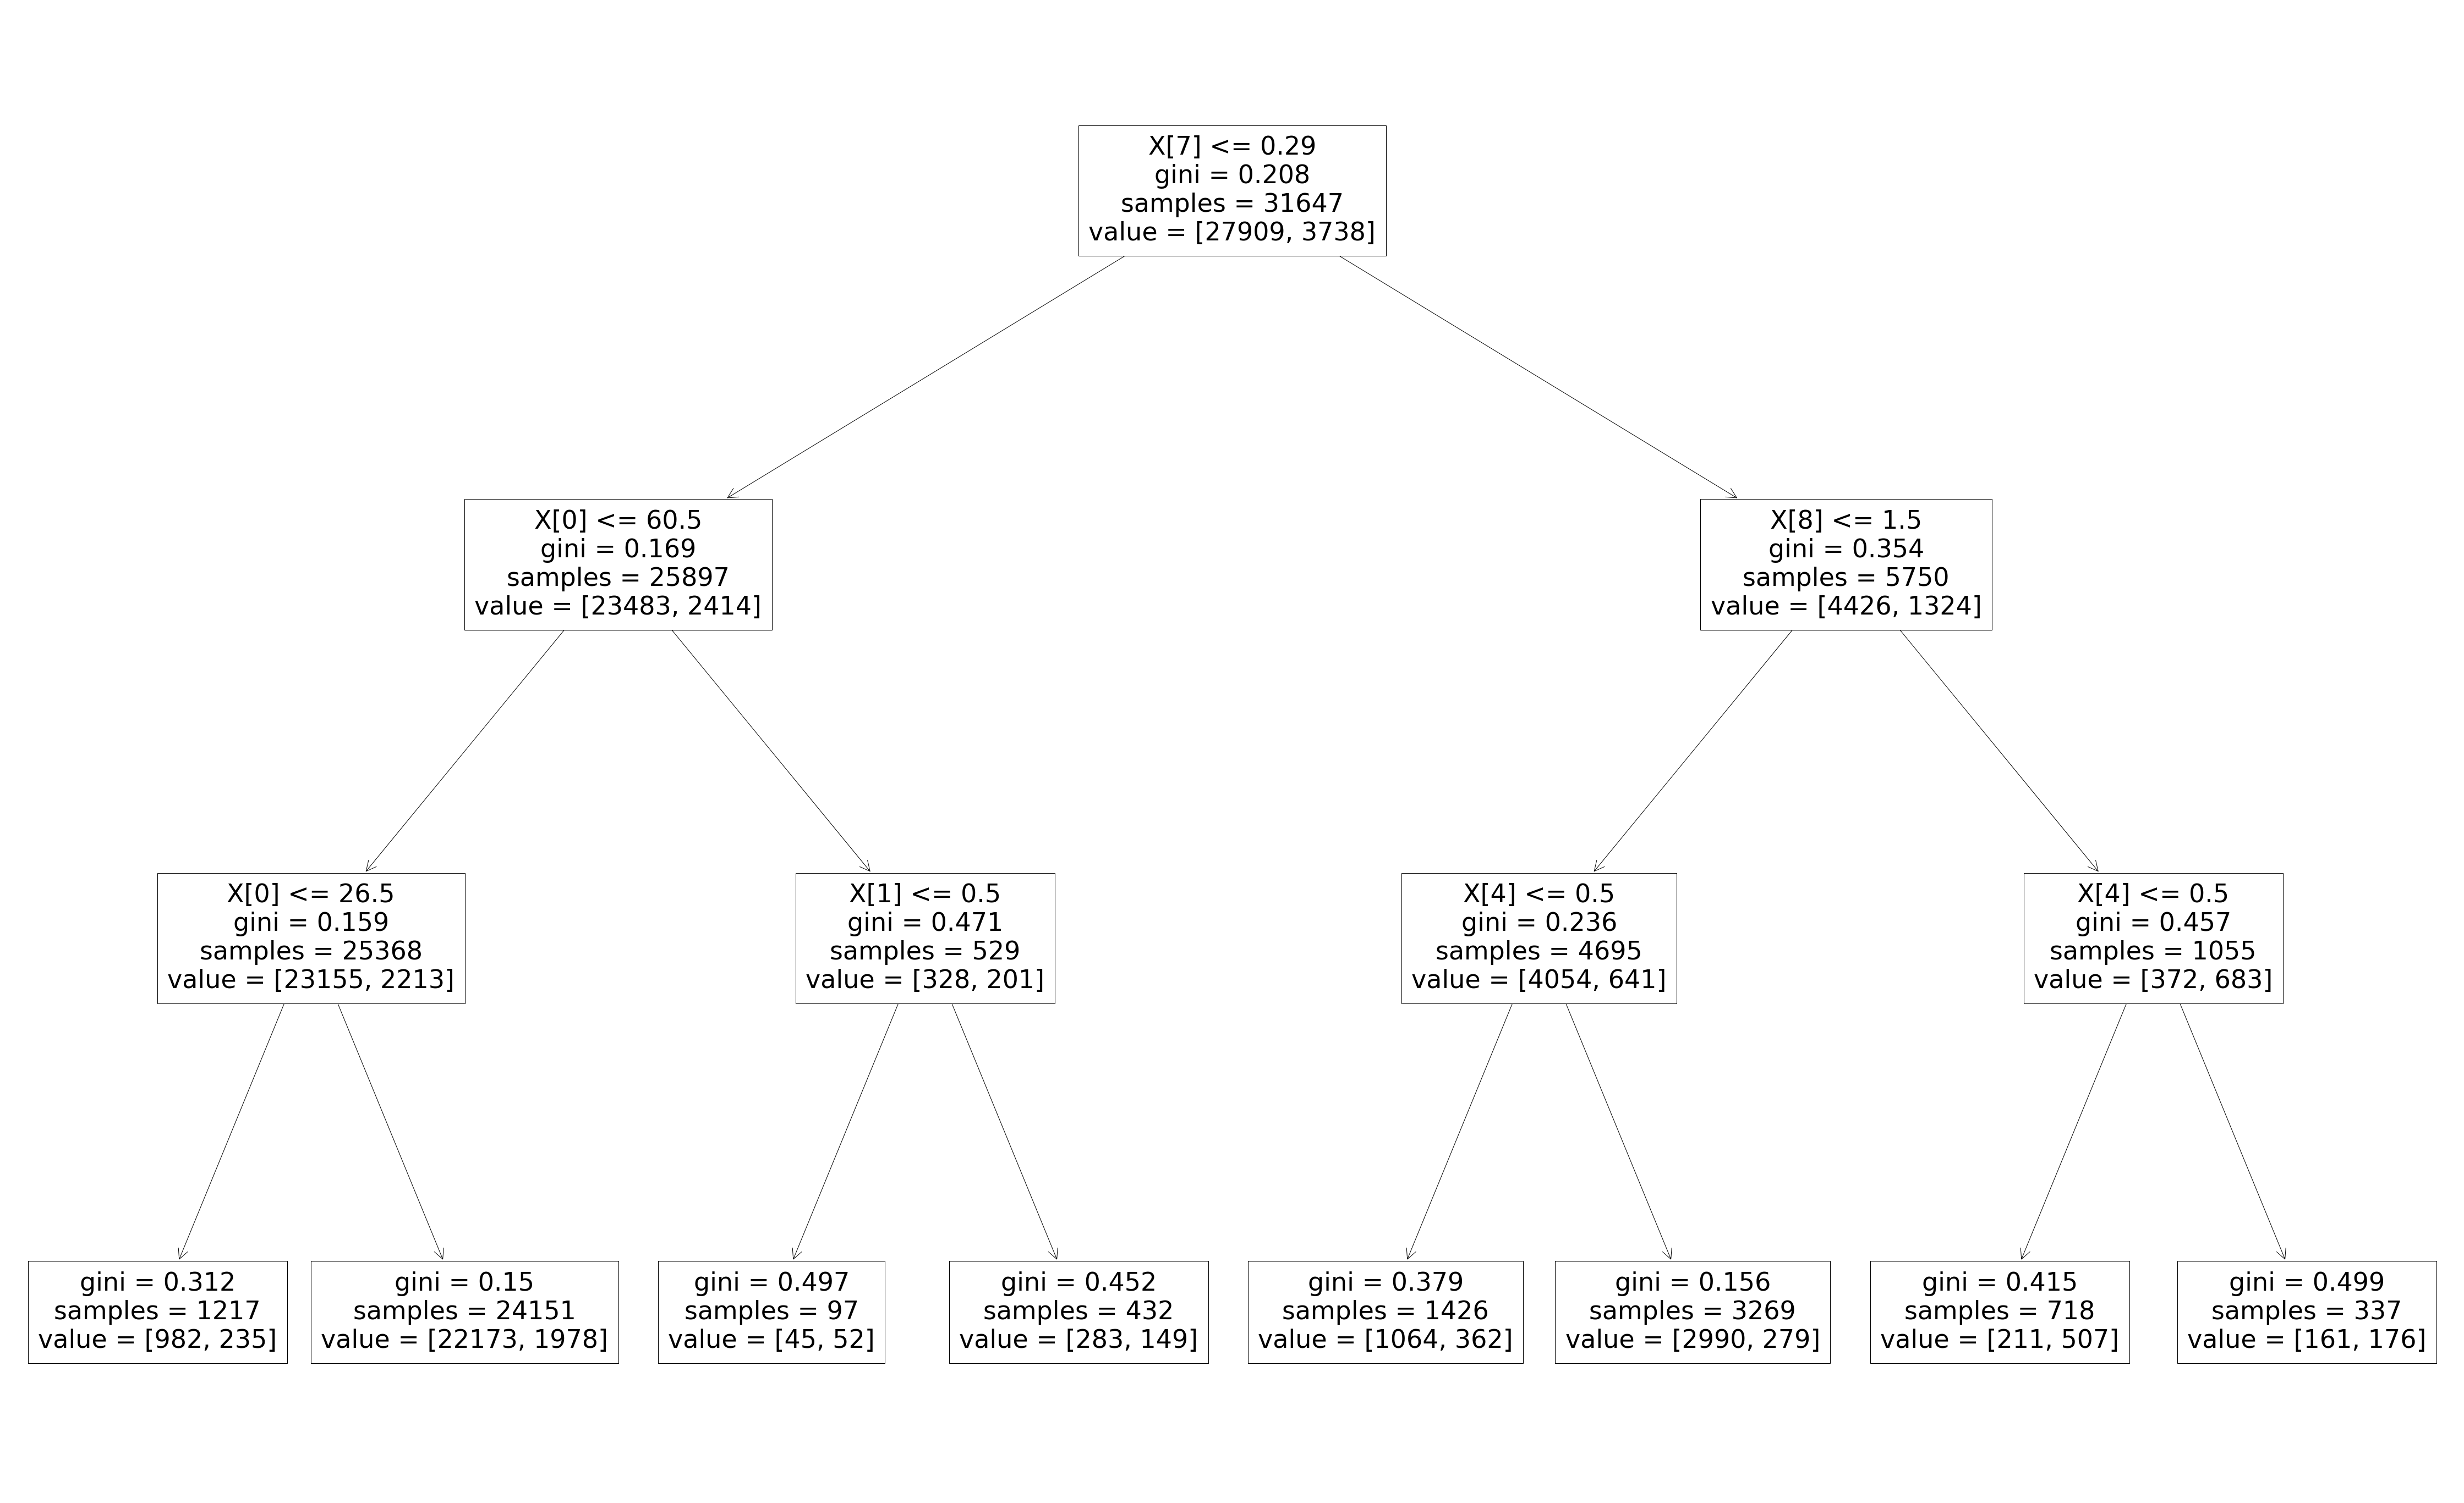

In [79]:
# Plotting the Tree:
from sklearn.tree import plot_tree
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50 # 80, 50 are pixel values
plot_tree(dTreeR)

In [80]:
feat_importance = dTreeR.tree_.compute_feature_importances(normalize=False) #compute feature importance


feat_imp_dict = dict(zip(feature_cols, dTreeR.feature_importances_)) #dictionary of columns and importance
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index') #conversion of dictionary to dataframe
feat_imp.sort_values(by=0, ascending=False) #sort in descending order

,0
poutcome,0.547320
previous,0.215141
age,0.142976
housing,0.087515
marital,0.007048
default,0.000000
balance,0.000000
loan,0.000000
campaign,0.000000


# Bagging:

In [81]:
bagc = BaggingClassifier(base_estimator=dTree, n_estimators=500,random_state=1) #Instantiate Bagging Classifier
bagc = bagc.fit(X_train, y_train) #Call the fit method of Bagging classifier to train the model or to learn the parameters of model
predicted_BAG = bagc.predict(X_test) #Predict


print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_BAG)) #for confusion matrix
print('-'*30)
BAG_accuracy = accuracy_score(y_test,predicted_BAG)
print('Accuracy of Decision Tree :{:.2f}'.format(BAG_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_BAG)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11613   400]
 [ 1222   329]]
------------------------------
Accuracy of Decision Tree :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.97      0.93     12013
           1       0.45      0.21      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

---------------------------------------------------------------


# Adaptive Boosting:

In [82]:
adab = AdaBoostClassifier(n_estimators=50, random_state=1) #Instantiate Adaptive boosting Classifier
adab = adab.fit(X_train, y_train) #Call the fit method of Adaptive boosting Classifier to train the model or to learn the parameters of model
predicted_ADA = adab.predict(X_test) #Predict



print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_ADA)) #for confusion matrix
print('-'*30)
ADA_accuracy = accuracy_score(y_test,predicted_ADA)
print('Accuracy of KNN :{:.2f}'.format(ADA_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_ADA)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11884   129]
 [ 1309   242]]
------------------------------
Accuracy of KNN :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.65      0.16      0.25      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

---------------------------------------------------------------


# Gradient boosting:

In [83]:
gradb = GradientBoostingClassifier(n_estimators = 100,random_state=1) #Instantiate Gradient boosting Classifier
gradb = gradb.fit(X_train, y_train)#Call the fit method of Gradient boosting Classifier to train the model or to learn the parameters of model
predicted_GRAD = gradb.predict(X_test) #Predict


print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_GRAD)) #for confusion matrix
print('-'*30)
GRAD_accuracy = accuracy_score(y_test,predicted_GRAD)
print('Accuracy of KNN :{:.2f}'.format(GRAD_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_GRAD)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11889   124]
 [ 1305   246]]
------------------------------
Accuracy of KNN :0.89
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.90      0.99      0.94     12013
           1       0.66      0.16      0.26      1551

    accuracy                           0.89     13564
   macro avg       0.78      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564

---------------------------------------------------------------


# Random Forest:

In [84]:
#n=100
randf = RandomForestClassifier(n_estimators = 100, random_state=1, max_features=3)#Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train) #Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RAN = randf.predict(X_test) #Predict

print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RAN )) #for confusion matrix
print('-'*30)
RAN_accuracy = accuracy_score(y_test,predicted_RAN )
print('Accuracy of KNN :{:.2f}'.format(RAN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RAN )) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11588   425]
 [ 1211   340]]
------------------------------
Accuracy of KNN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.96      0.93     12013
           1       0.44      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.67      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

---------------------------------------------------------------


In [85]:
#n=500
randf = RandomForestClassifier(n_estimators = 500, random_state=1, max_features=5) #Instantiate Random Forest Classifier
randf = randf.fit(X_train, y_train)  #Call the fit method of Random Forest Classifier to train the model or to learn the parameters of model
predicted_RANN = randf.predict(X_test) #Predict

print('\033[1m''-'*63)
print('\033[1m''Confusion Matrix\n',confusion_matrix(y_test,predicted_RANN)) #for confusion matrix
print('-'*30)
RANN_accuracy = accuracy_score(y_test,predicted_RANN)
print('Accuracy of KNN :{:.2f}'.format(RANN_accuracy)) #for accuracy score
print('-'*30)
print('\n Classification Report\n',classification_report(y_test,predicted_RANN)) #for classification report
print('-'*63)

---------------------------------------------------------------
Confusion Matrix
 [[11614   399]
 [ 1216   335]]
------------------------------
Accuracy of KNN :0.88
------------------------------

 Classification Report
               precision    recall  f1-score   support

           0       0.91      0.97      0.93     12013
           1       0.46      0.22      0.29      1551

    accuracy                           0.88     13564
   macro avg       0.68      0.59      0.61     13564
weighted avg       0.85      0.88      0.86     13564

---------------------------------------------------------------


# Models with accuracy scores:

In [86]:
Scores = [('Naive bayes', NB_accuracy),
      ('KNN', KNN_accuracy),
      ('Logistic Regression', LR_accuracy),
      ('SVC', SVC_accuracy ),
      ('Decision Tree',DT_accuracy),
      ('Decision Tree with Regularization',DTR_accuracy),
      ('Bagging',BAG_accuracy),
      ('Adaptive Boosting',ADA_accuracy),
      ('Gradient Boosting',GRAD_accuracy),
      ('Random Forest N=100',RAN_accuracy),
      ('Random Forest N=500',RANN_accuracy)] #List of accuracy scores of all models

Scores = pd.DataFrame(Scores,columns=['Model','Accuracy score']) #Conversion of list to dataframe

print('\033[1m''Current Scores with Outliers replaced with mean:')
Scores.sort_values(by='Accuracy score',ascending=False) #Sort values in descending manner

Current Scores with Outliers replaced with mean:


,Model,Accuracy score
3,SVC,0.895385
5,Decision Tree with Regularization,0.895016
2,Logistic Regression,0.894869
8,Gradient Boosting,0.894648
7,Adaptive Boosting,0.893984
10,Random Forest N=500,0.880935
6,Bagging,0.880419
9,Random Forest N=100,0.879387
1,KNN,0.873120
4,Decision Tree,0.839059


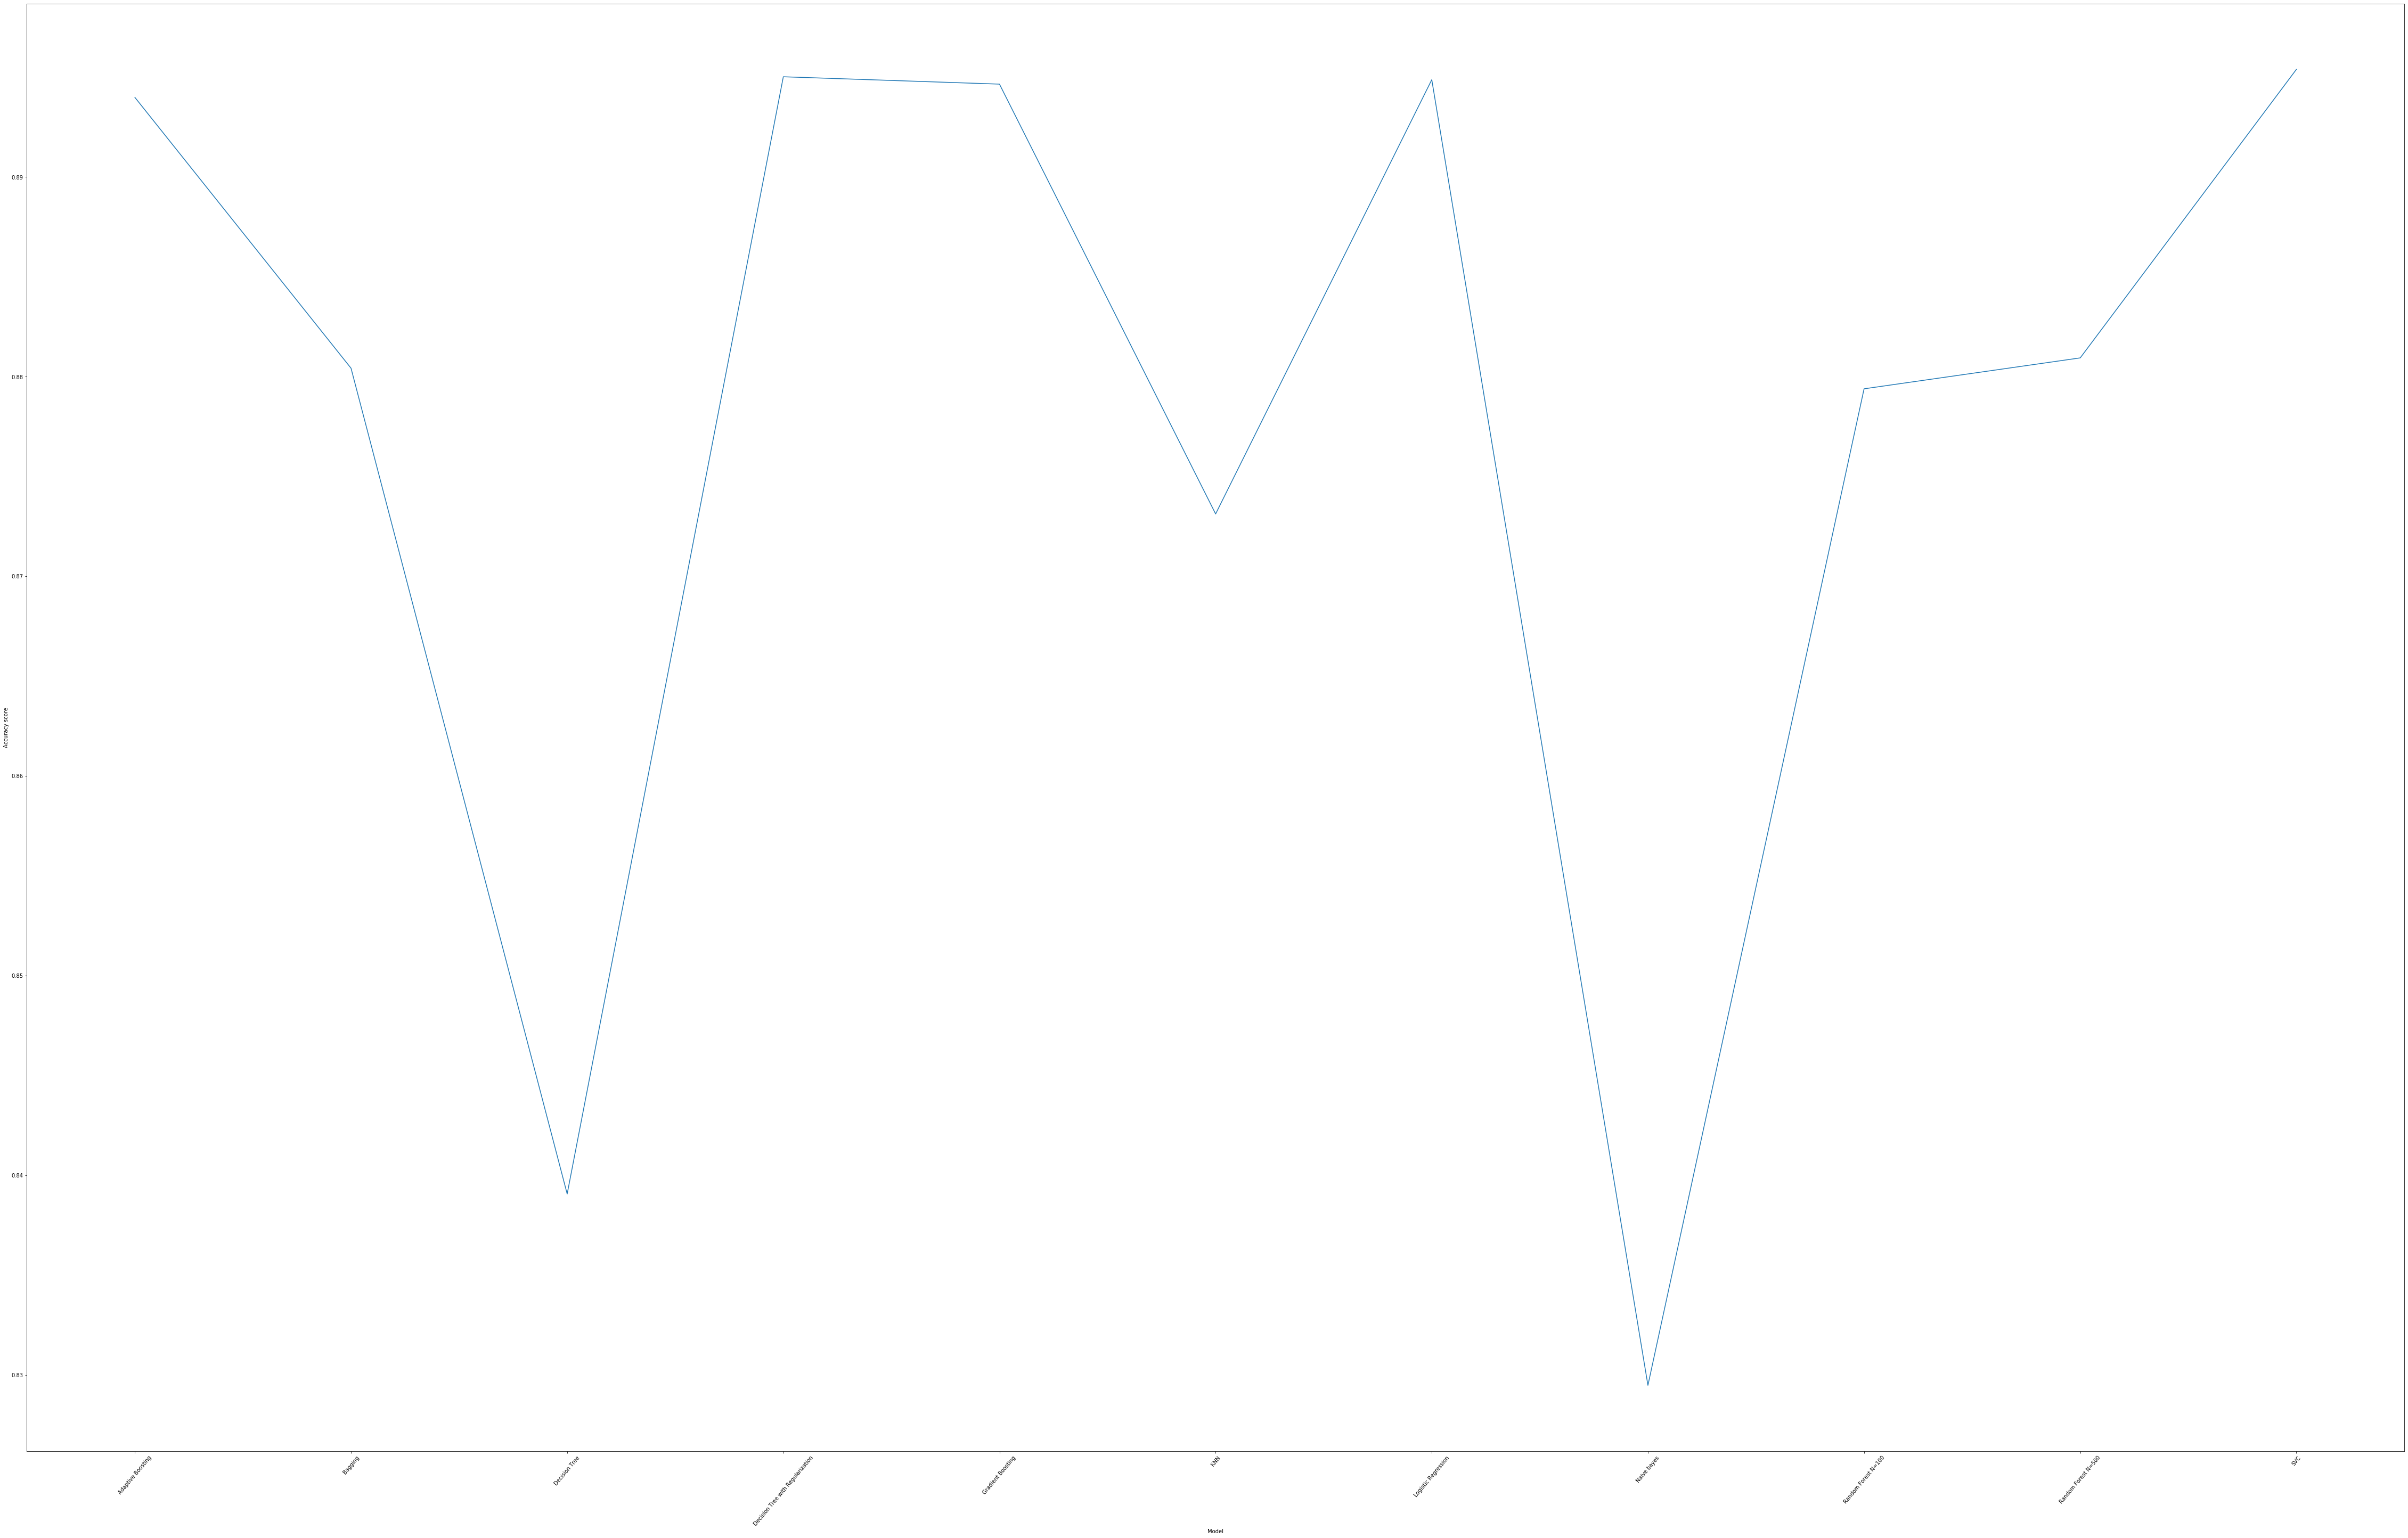

In [90]:
sns.lineplot(x=Scores['Model'],y=Scores['Accuracy score'],data=Scores,markers=True, dashes=False) #Countplot of Scores
plt.xticks(rotation=50)
plt.show()

# Conclusion:


# Comments on dataset:
1. The models perform well in predicting the class 0 i.e. customer not subscribing to term deposit which can be seen in the confusion matrix of all models.
2. The models do not perform well in predicting the class 1 i.e. customer subscribing to term deposit which can be seen in the confusion matrix of all models.
3. Above situation occured because the Dataset is imbalanced. i.e. The ratio difference between class 0 and class 1 is huge. 4. 4. Which trained models to effectively identify class 0 but did not train suffuiciently to classify class 1.
5. This situation could have been avoided if the datset was balanced.
6. Along with imbalance, the dataset contained large number of unknown string values in 'job','education','contact' and 'poutcome' columns.



# Comments on Models:
1. When benchmarking with 'duration' column, Support Vector Classifier achieved 90% model accuracy while naive bayes score was 85% accurate.
2. SVC Perfomed better because of it's capabality of creating multiple hpyerplanes and then classifying the data.
3. After removing the 'duration' column, The highest model score dropped by 0.5%.
4. The Outliers did not affect much on accuracy scores of all models. As can be seen in above accuracy scores, getting rid of outliers by mean/median replacement did not affect the scores.
5. In Decision Trees, Gradient boosting method always performed better for this dataset.
6. While visualizing Decision Tree, The Pruned decision tree was easy to visualize as it had lesser leaf nodes than Tree which was not pruned.


# Miscellaneous Comments:
1. After trying get_dummies the score did not show significant difference as well as I have skipped the get_dummies step because the dataset was creating more dimension, which was making the project more computationally intensive.
2. If I had kept get_dummies step, then in production stage if the new dataset turned out to be huge in number of rows then this project would have taken a lot of time to execute.
3. Outlier handeling did not make any significant difference in the accuracy scores of models.
4. I have tried to keep minimum time complexity of this project.